# Exercise: Linear regression using different regression methods

In this exercise, we will have a look at two different methods used in linear regression.

## Loading the data

Let's start by having a look at the data.

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from numpy import  reshape, array
import pandas as pd
import matplotlib.pyplot as graph



data = {
    'shoe_length' : [24, 18, 28, 31, 16, 34, 25, 19, 25, 33,
                    19, 29, 29, 32, 19, 25, 24, 15, 16, 33,
                    28, 18, 15, 19, 26, 24, 28, 16, 22, 31,
                    21, 19, 21, 37, 11, 37, 22, 22, 20, 39,
                    11, 33, 26, 38, 12, 29, 21, 19, 15, 37,
                    25, 22, 13, 26, 23, 27, 23, 19, 20, 36,
                    ],
    'height': [167, 148, 180, 198, 153, 207, 183, 157, 167, 188,
               152, 184, 174, 191, 164, 176, 177, 145, 171, 200,
               175, 149, 149, 149, 175, 183, 190, 172, 175, 175,
               164, 150, 175, 199, 150, 200, 177, 167, 160, 190,
               149, 188, 170, 198, 179, 179, 173, 149, 168, 207,
               173, 149, 148, 149, 173, 187, 188, 177, 187, 178]
}


# Convert it into a table using pandas
dataset = pd.DataFrame(data)

# Print the data
print(dataset)

    shoe_length  height
0            24     167
1            18     148
2            28     180
3            31     198
4            16     153
5            34     207
6            25     183
7            19     157
8            25     167
9            33     188
10           19     152
11           29     184
12           29     174
13           32     191
14           19     164
15           25     176
16           24     177
17           15     145
18           16     171
19           33     200
20           28     175
21           18     149
22           15     149
23           19     149
24           26     175
25           24     183
26           28     190
27           16     172
28           22     175
29           31     175
30           21     164
31           19     150
32           21     175
33           37     199
34           11     150
35           37     200
36           22     177
37           22     167
38           20     160
39           39     190
40           11 

## First method: Ordinary Least Squares Regression

The first method we'll look at is called "Ordinary Least Squares Regression". It works by minimizing the residual sum of squares between the actual and predicted labels of the dataset. We will use the RMSE value to gauge the quality of the regression.

In [2]:
X = array(dataset['shoe_length'])
y = array(dataset['height'])

#reshape arrays for the fitting processes

X = X.reshape(-1,1)
y = y.reshape(-1,1)

model_ols = LinearRegression().fit(X,y)
y_ols_pred = model_ols.predict(X)
rmse_ols = mean_squared_error(y, y_ols_pred, squared=False)
print(f"RMSE Ordinary Least Squares: {rmse_ols}")

RMSE Ordinary Least Squares: 10.618463582658775


## Second method: Ridge Regression

The second method we'll look at is called "Ridge Regression". Similarly to the "Ordinary Least Squares" method, this method works by minimizing the residual sum of squares between the actual and predicted labels of the dataset, but is differentiated from it by the inclusion of an additional penalty term in the cost function. Again, we will use the RMSE value to gauge the quality of the regression.

In [26]:
model_ridge = Ridge().fit(X,y)
y_ridge_pred = model_ridge.predict(X)
rmse_ridge = mean_squared_error(y, y_ridge_pred, squared=False)
print(f"RMSE Ridge: {rmse_ridge}")


RMSE Ridge: 10.618464417697345


## Visualization

The RMSE values obtained from the two models seem very close. Let's plot the regression lines of these two models so we can get a better idea of how they fitted the data.

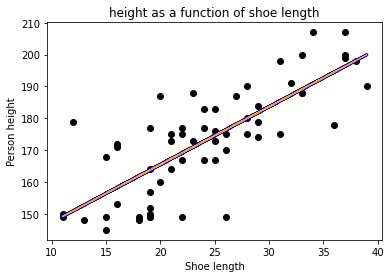

In [27]:
# Show a graph of the result
# Don't worry about how this is done for now
%matplotlib inline
intercept_ols = model_ols.intercept_
slope_ols = model_ols.coef_
line_ols = slope_ols * X + intercept_ols
intercept_ridge = model_ridge.intercept_
slope_ridge = model_ridge.coef_
line_ridge = slope_ridge * X + intercept_ridge
graph.scatter(X, y,  color='black')
graph.plot(X, line_ols, '-', c = 'blue', linewidth = 3)
graph.plot(X, line_ridge, '-', c = 'orange', linewidth = 1)
graph.ylabel('Person height')
graph.xlabel("Shoe length")
graph.title('height as a function of shoe length')
graph.show()

The plot confirms what the RMSE values told us previously. While both methods perform very similary on our dataset, it is important to note this may not be the case for other datasets, and that the choice of which regression method to use should be made accordingly.

## Summary

In this exercise, you learned about the differences between "Ordinary Least Squares Regression" and "Ridge Regression", and how to use them to fit a regression line to a given dataset.